<a href="https://colab.research.google.com/github/MarcosMob/AluraDS_Study/blob/main/DS_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucas - Analisando as vendas

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
alucar = pd.read_csv('/content/alucar.csv')

In [157]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [158]:
alucar.shape

(24, 2)

In [159]:
alucar.isna().sum()

,0
mes,0
vendas,0


In [160]:
alucar.dtypes

,0
mes,object
vendas,int64


Convertendo em datetime

In [161]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [162]:
alucar.dtypes

,0
mes,datetime64[ns]
vendas,int64


<Axes: xlabel='mes', ylabel='vendas'>

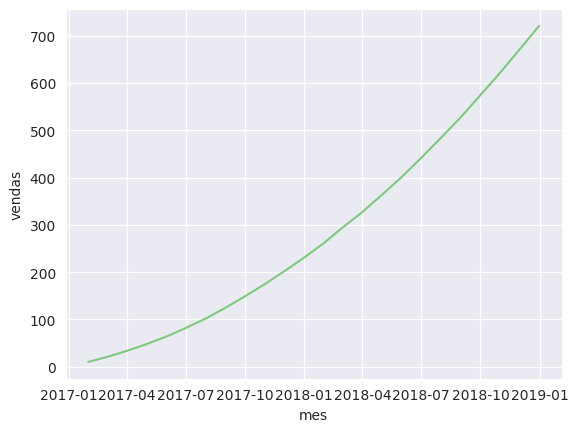

In [163]:
sns.lineplot(data=alucar, x='mes', y='vendas')

In [164]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

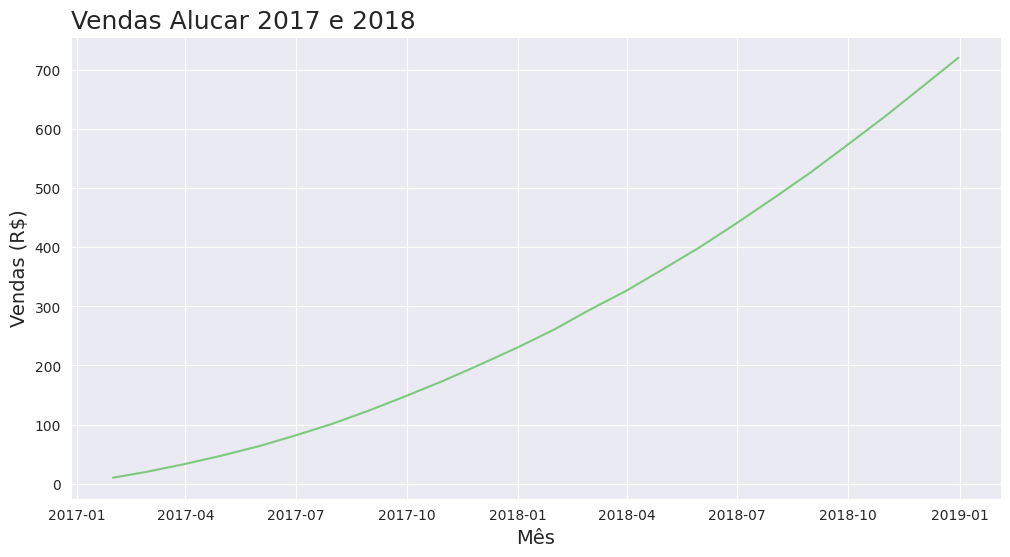

In [165]:
ax = sns.lineplot(data=alucar, x='mes', y='vendas')
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar 2017 e 2018',loc = 'left', fontsize = 18)
ax.set_xlabel('Mês',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

In [166]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [167]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(data=dataset, x=x, y=y)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo,loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx,fontsize = 14)
  ax.set_ylabel(labely,fontsize = 14)
  ax = ax

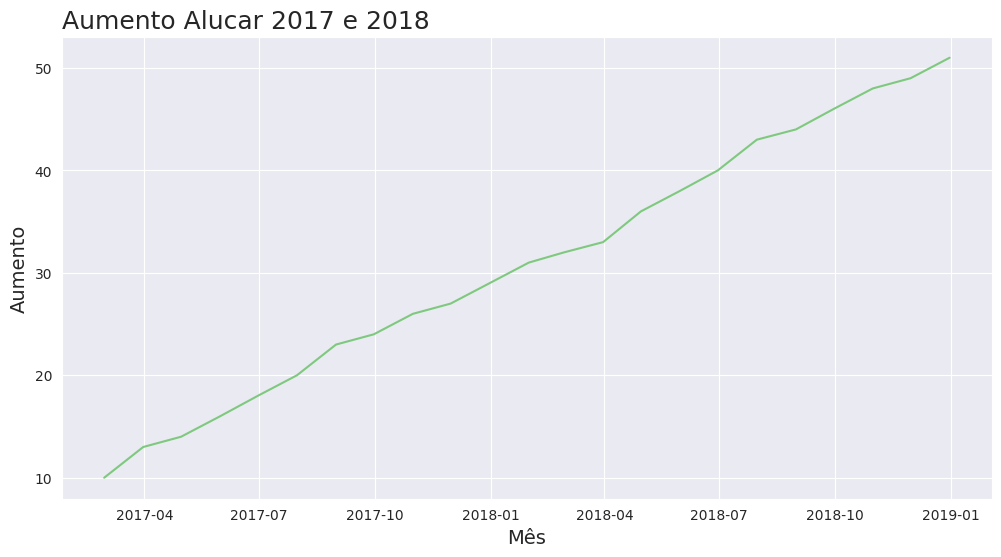

In [168]:
plotar('Aumento Alucar 2017 e 2018', 'Mês', 'Aumento', 'mes', 'aumento', alucar)

In [169]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


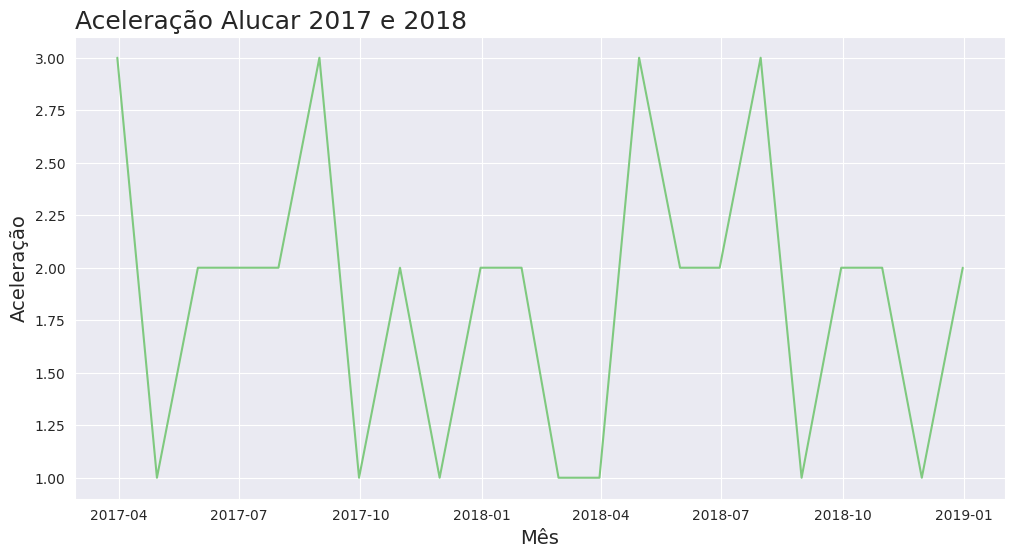

In [170]:
plotar('Aceleração Alucar 2017 e 2018', 'Mês', 'Aceleração', 'mes', 'aceleracao', alucar)

In [171]:
def plot_comparacao(x, y1, y2, y3,dataset, titulo):
  plt.figure(figsize =(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(data=dataset, x=x, y=y1)
  ax = plt.subplot(3,1,2)
  sns.lineplot(data=dataset, x=x, y=y2)
  ax = plt.subplot(3,1,3)
  sns.lineplot(data=dataset, x=x, y=y3)
  ax = ax

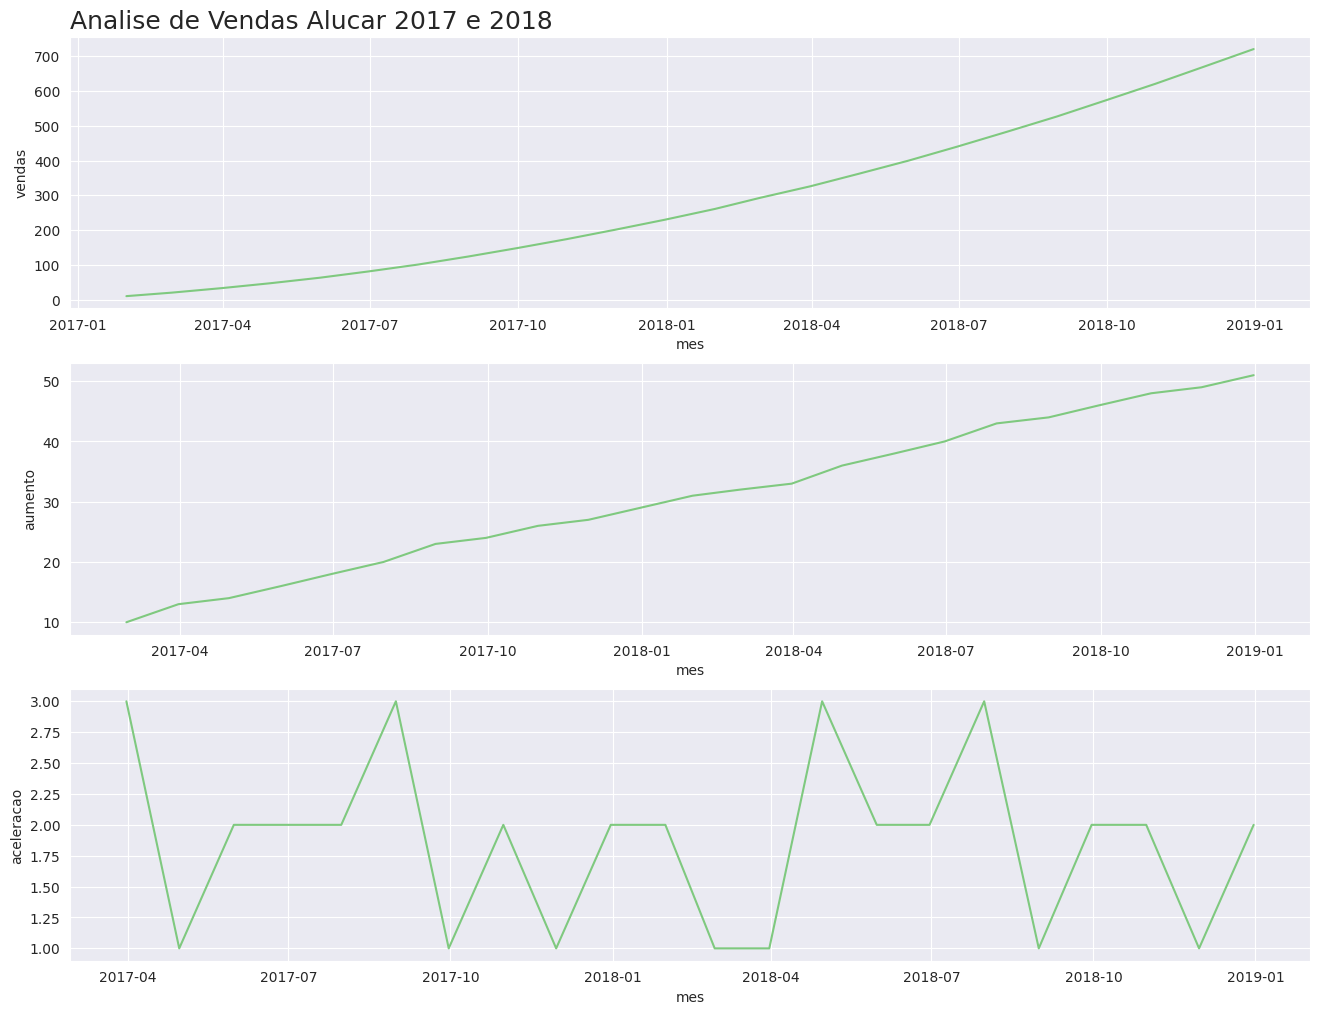

In [172]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Analise de Vendas Alucar 2017 e 2018')

Autocorrelação

In [173]:
from pandas.plotting import autocorrelation_plot

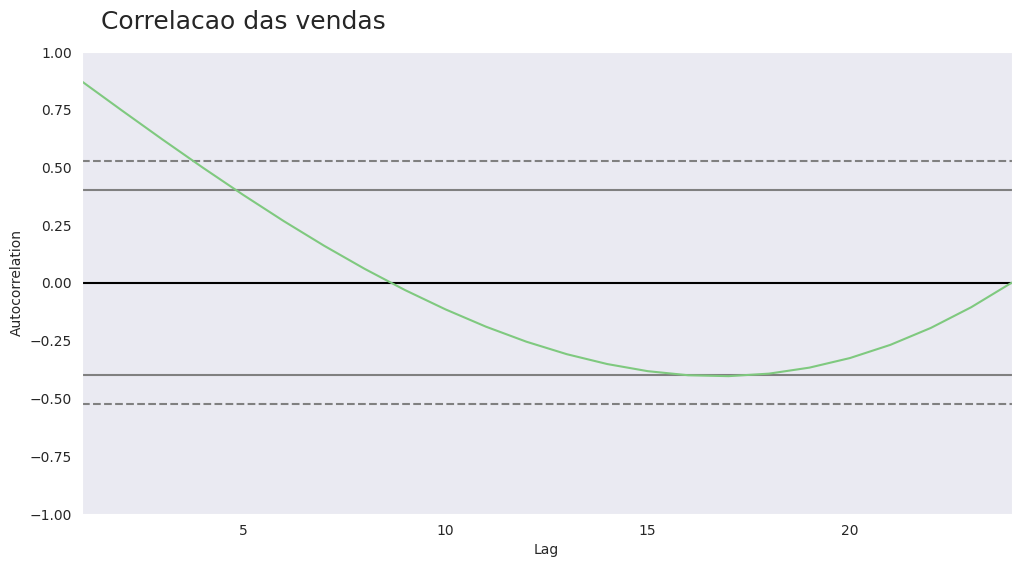

In [174]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

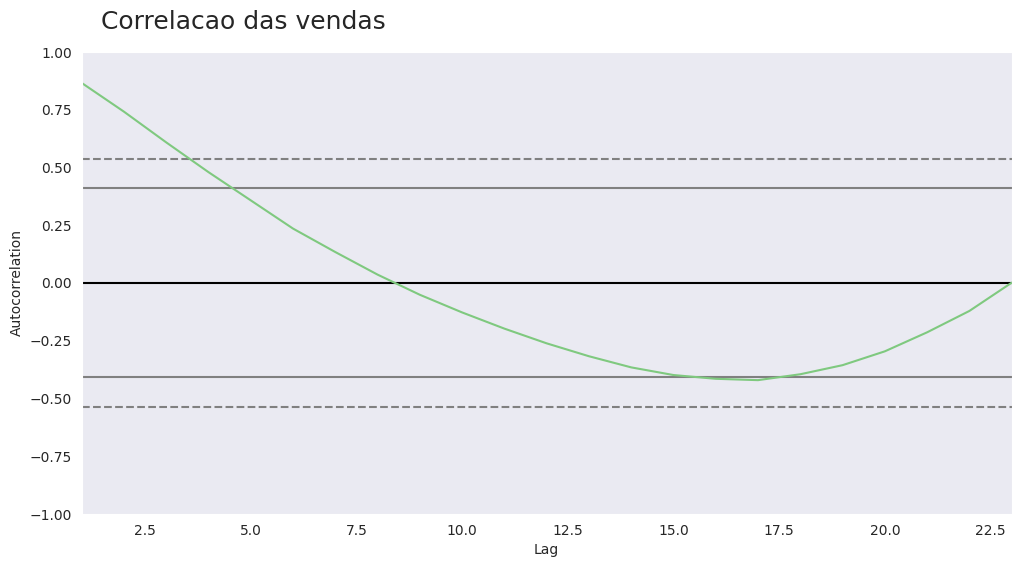

In [175]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

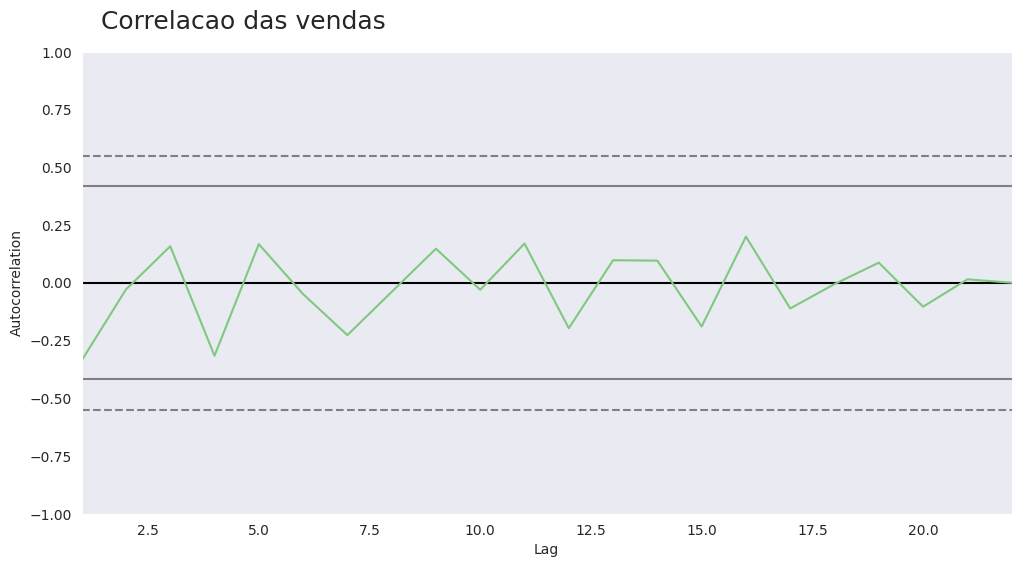

In [176]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

#Analisando assinantes das newletter

In [177]:
assinantes = pd.read_csv("/content/newsletter_alucar.csv")
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [178]:
assinantes.dtypes

,0
mes,object
assinantes,int64


In [179]:
assinantes.isna().sum()

,0
mes,0
assinantes,0


In [180]:
assinantes.shape

(24, 2)

In [181]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [182]:
assinantes.dtypes

,0
mes,datetime64[ns]
assinantes,int64


In [183]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


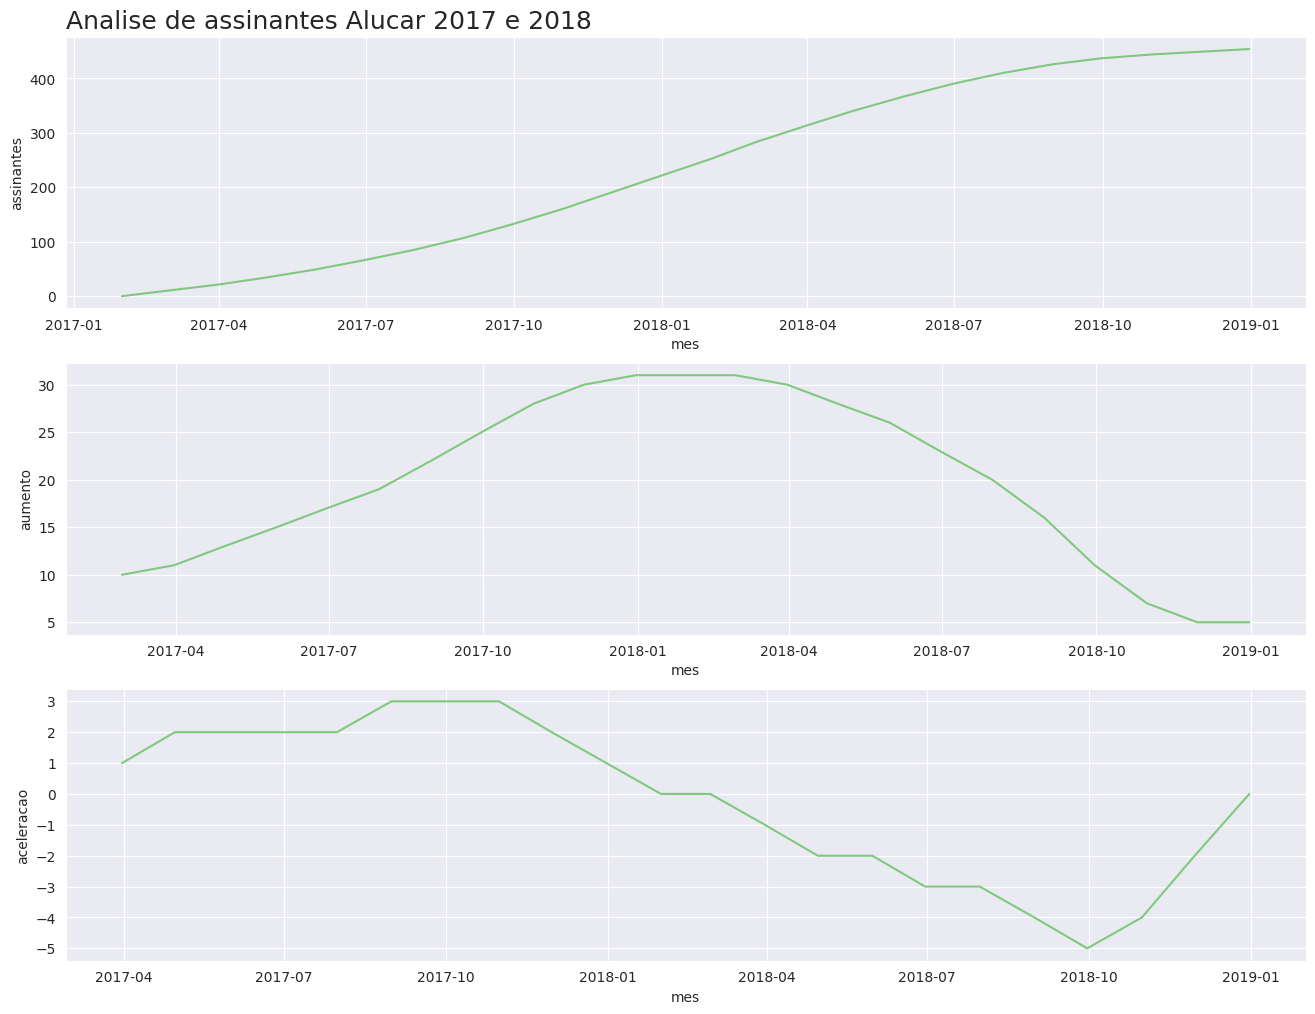

In [184]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Analise de assinantes Alucar 2017 e 2018')

# Chocolura

In [185]:
chocolura = pd.read_csv('/content/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [186]:
chocolura.dtypes

,0
mes,object
vendas,int64


In [187]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

,0
mes,datetime64[ns]
vendas,int64


In [188]:
chocolura.shape

(24, 2)

In [189]:
chocolura['aumento']= chocolura['vendas'].diff()
chocolura['aceleracao']= chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


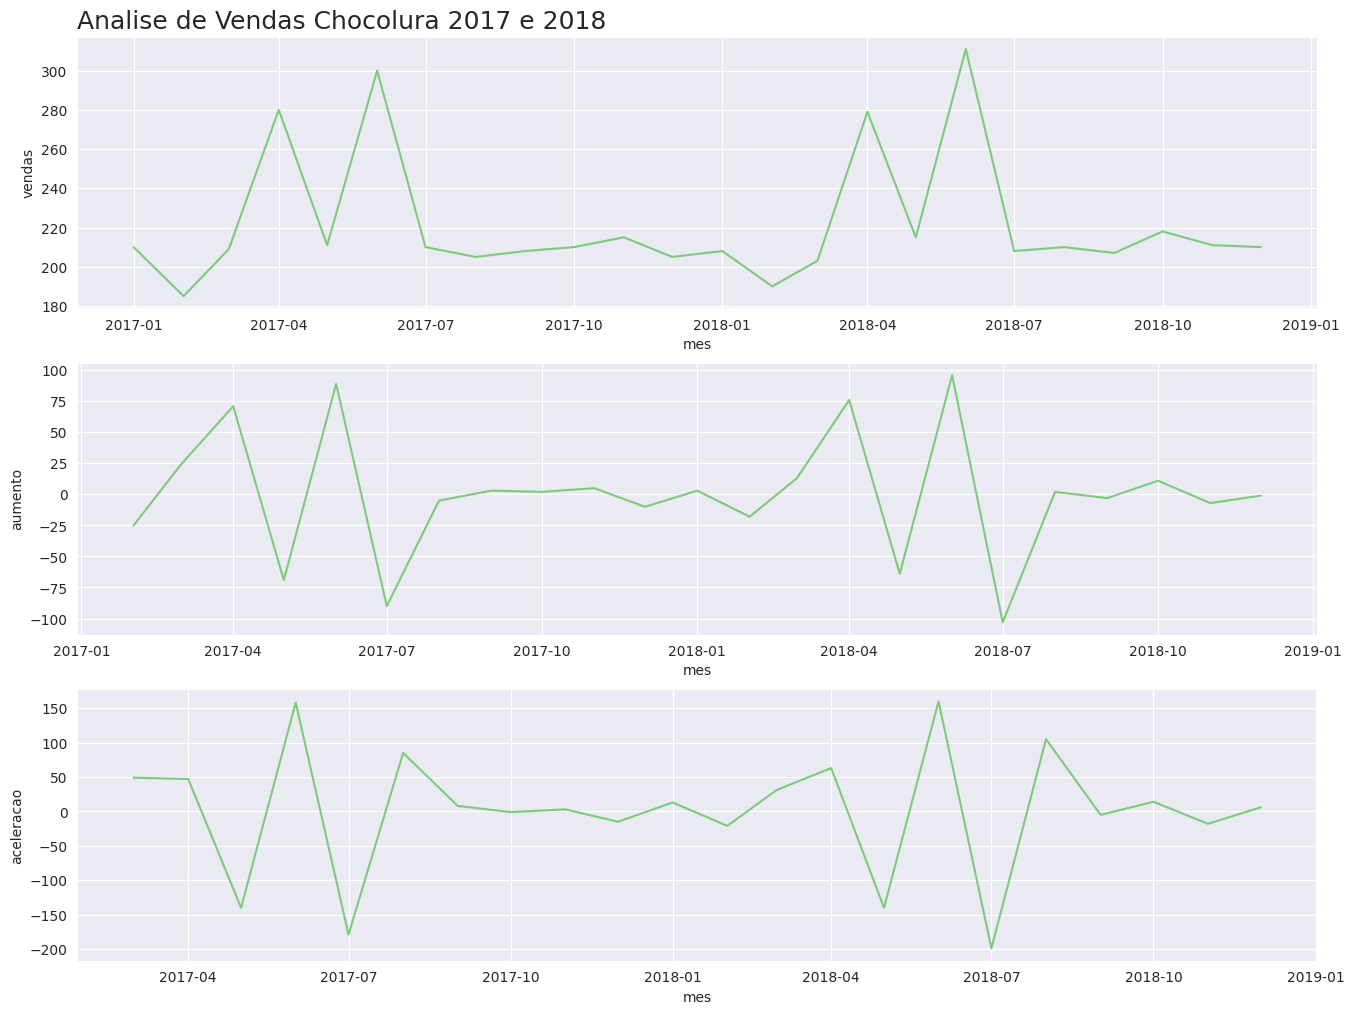

In [190]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Analise de Vendas Chocolura 2017 e 2018')

# Chocolura - Vendas diarias

In [191]:
vendas_por_dia = pd.read_csv('/content/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [192]:
vendas_por_dia.dtypes

,0
dia,object
vendas,int64


In [193]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

,0
dia,datetime64[ns]
vendas,int64


In [194]:
vendas_por_dia.isna().sum()

,0
dia,0
vendas,0


In [195]:
vendas_por_dia.shape

(61, 2)

In [196]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


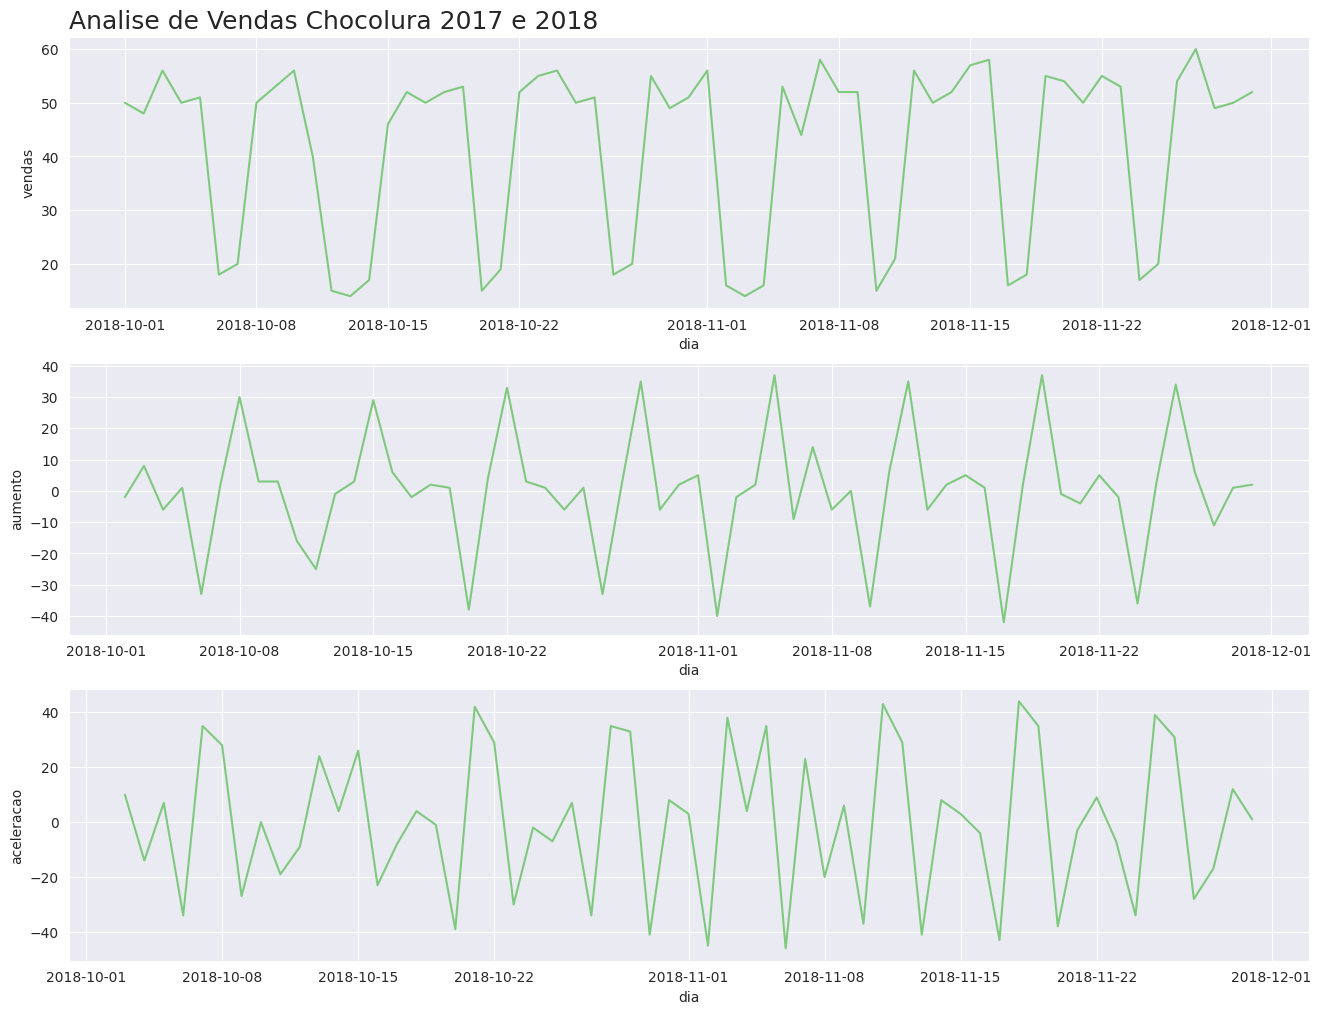

In [197]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Analise de Vendas Chocolura 2017 e 2018')

**Analisando a sazionalidade**

In [198]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.dayofweek
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4


In [199]:
vendas_por_dia['dia_da_semana'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [200]:
dias_traduzidos = {0:'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sabado', 6:'Domingo'}

In [201]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [202]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


# Correlacao das Vendas Diarias

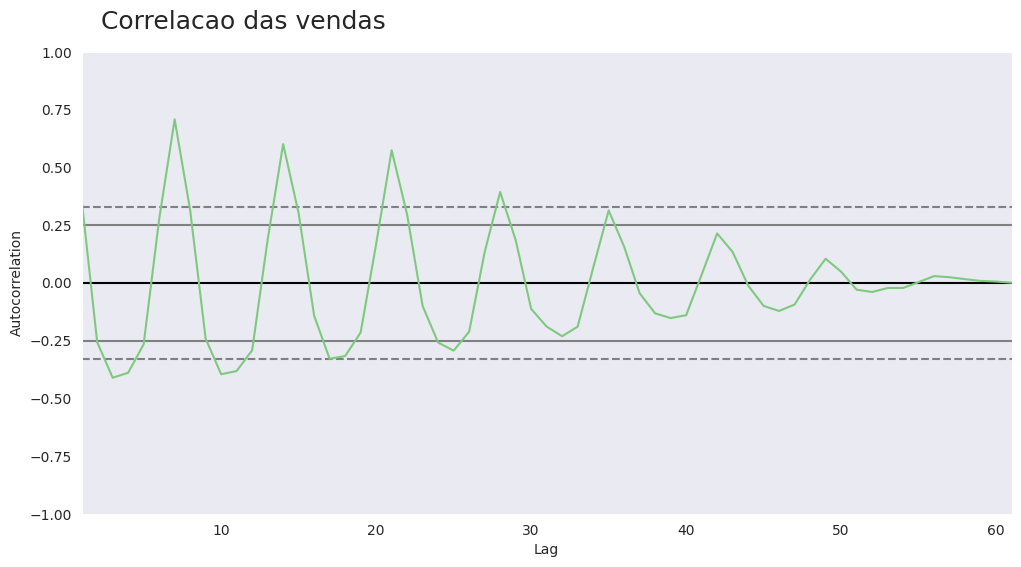

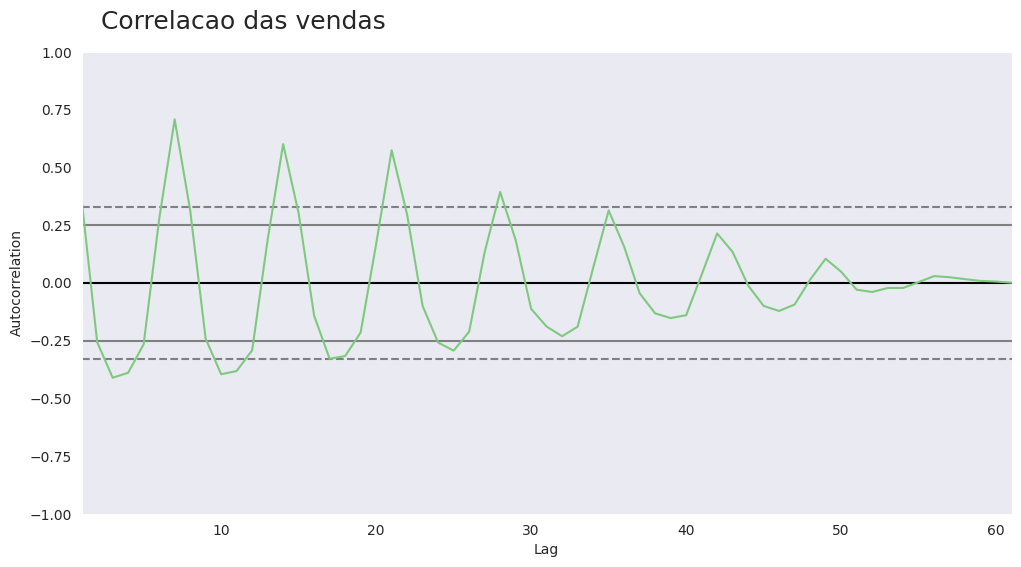

In [203]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax

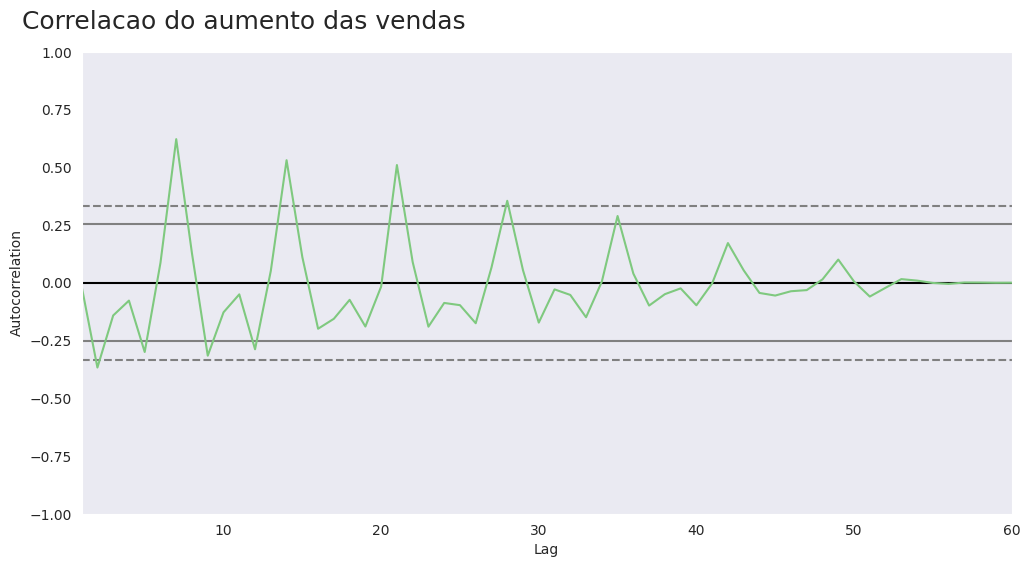

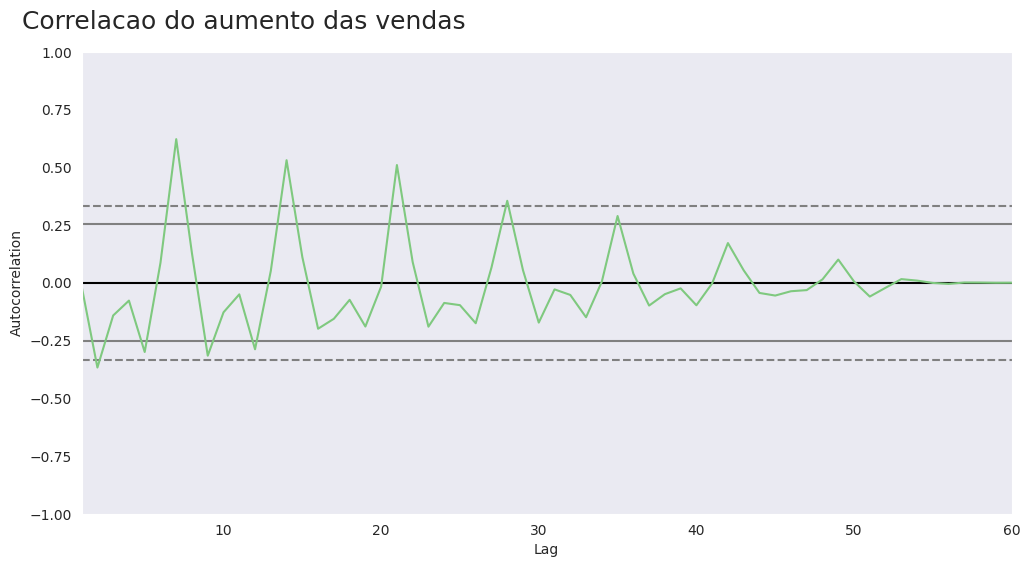

In [204]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao do aumento das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax

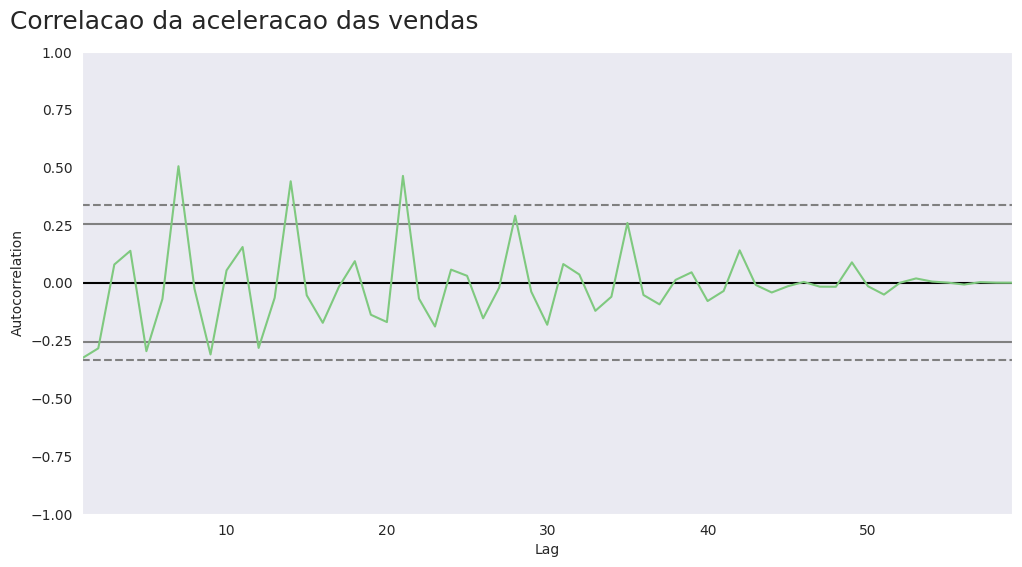

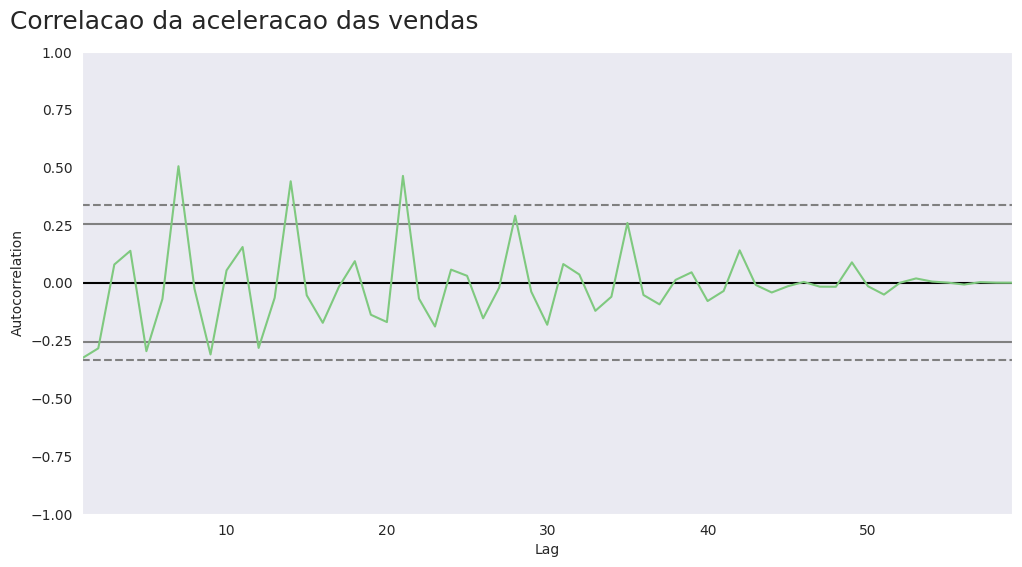

In [205]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao da aceleracao das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax

# Cafelura - Analise de Vendas

In [206]:
cafelura = pd.read_csv('/content/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [207]:
cafelura.dtypes

,0
mes,object
vendas,int64


In [208]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

,0
mes,datetime64[ns]
vendas,int64


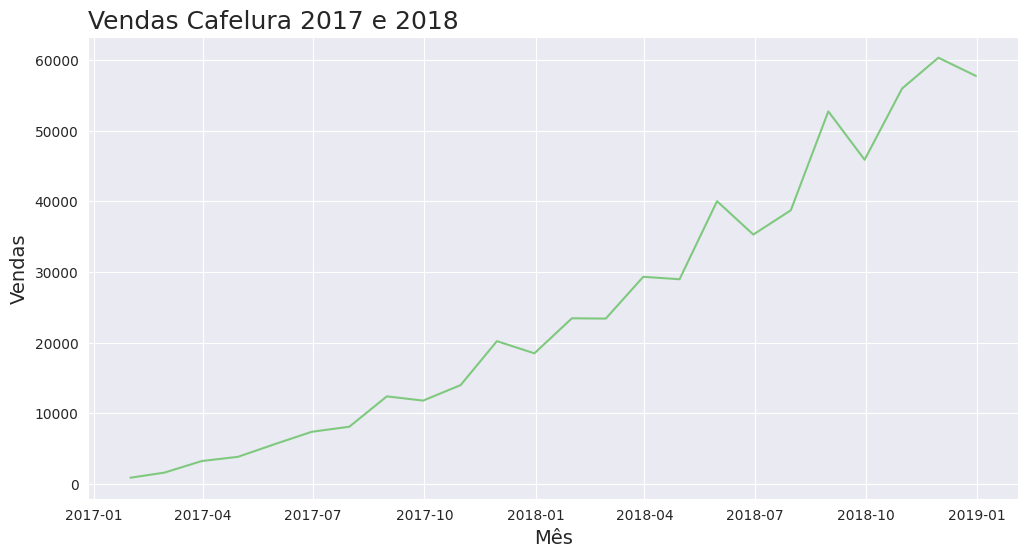

In [209]:
plotar('Vendas Cafelura 2017 e 2018', 'Mês', 'Vendas', 'mes', 'vendas', cafelura)

In [210]:
quantidade_dias_fim_de_semana = pd.read_csv('/content/dias_final_de_semana.csv')
quantidade_dias_fim_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [211]:
quantidade_dias_fim_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [212]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_dias_fim_de_semana['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


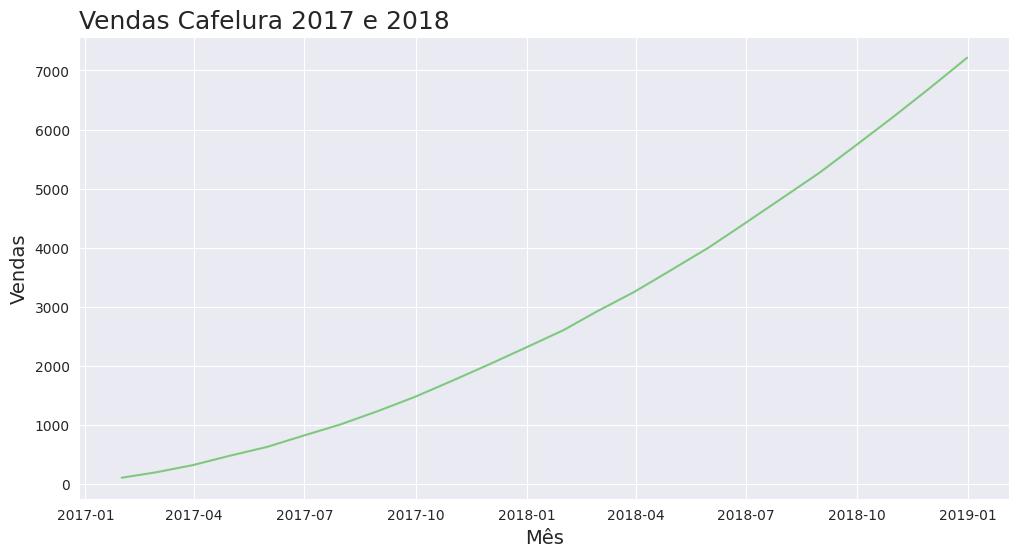

In [213]:
plotar('Vendas Cafelura 2017 e 2018', 'Mês', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

<Axes: title={'left': 'Vendas Cafelura 2017 e 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

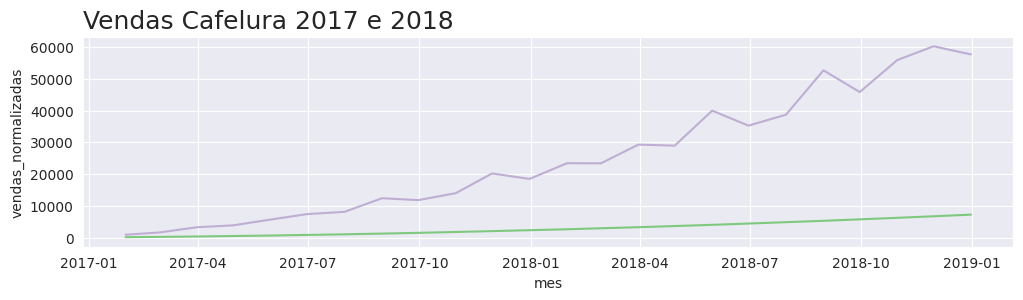

In [214]:
plt.figure(figsize=(12,6))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(data=cafelura, x='mes', y='vendas_normalizadas')
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(data=cafelura, x='mes', y='vendas')


# StatsModels

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose

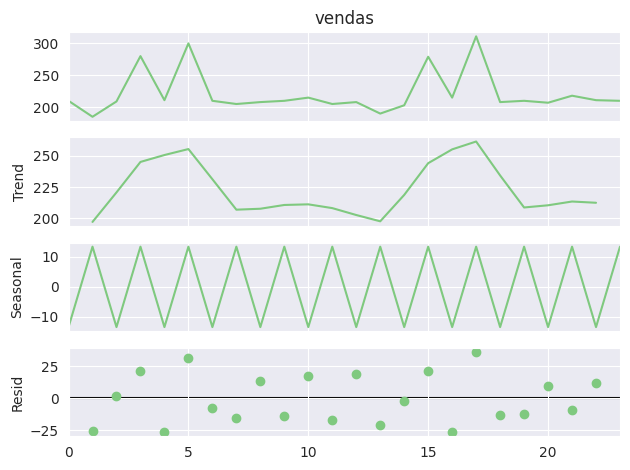

In [216]:
resultado = seasonal_decompose(chocolura['vendas'], period=2)
ax = resultado.plot()

In [217]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [218]:
data = {'Observacao':observacao, 'Tendencia':tendencia, 'Sazonalidade':sazonalidade, 'Ruido':ruido}
resultado = pd.DataFrame(data)
resultado.head()

,Observacao,Tendencia,Sazonalidade,Ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


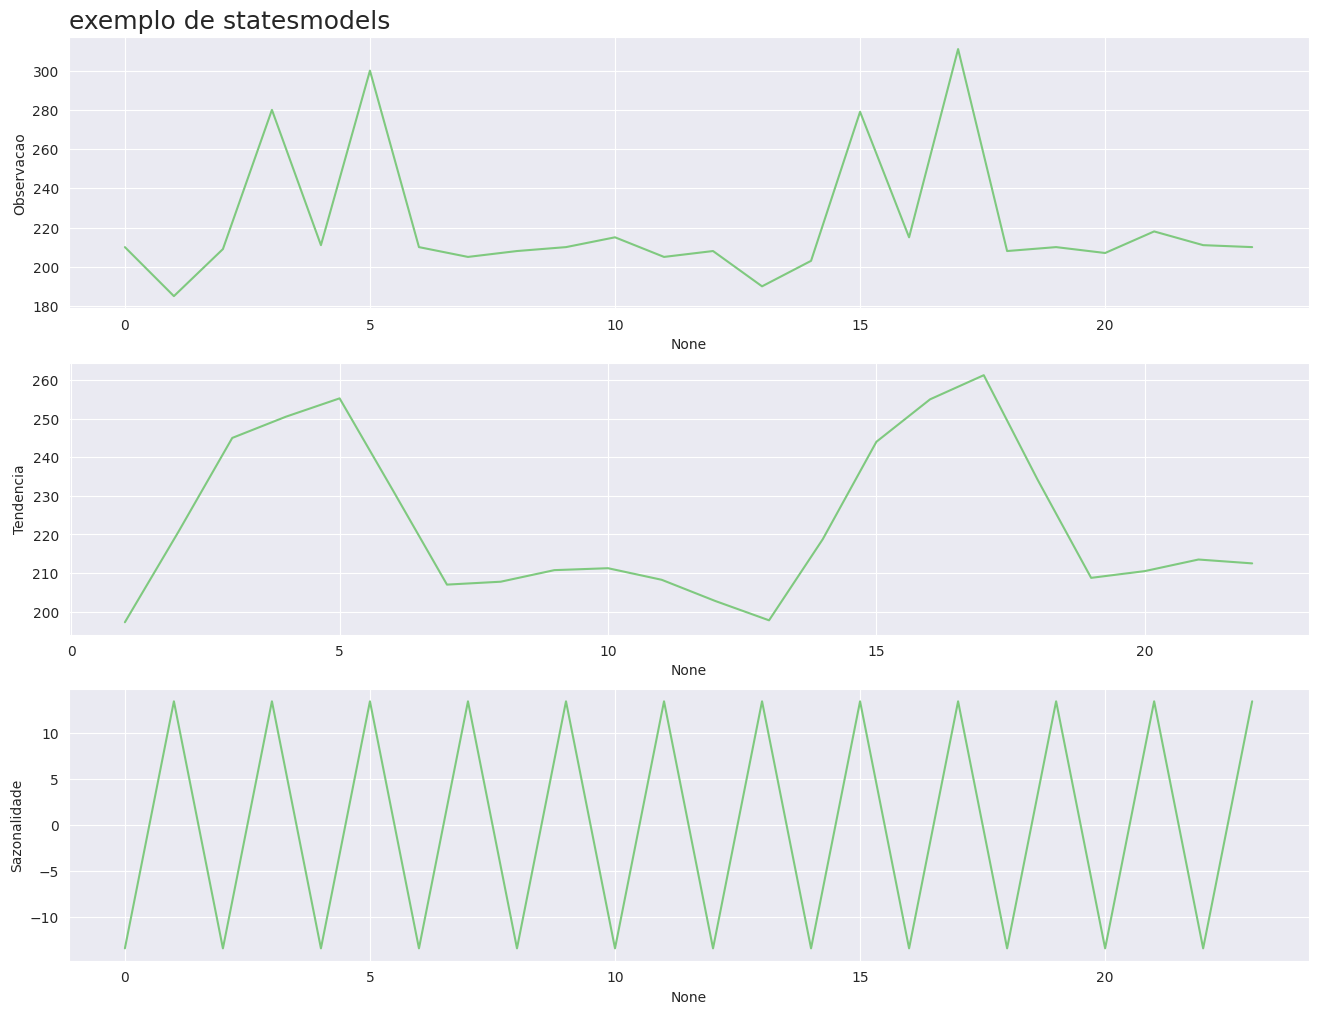

In [219]:
plot_comparacao(resultado.index,'Observacao','Tendencia','Sazonalidade',resultado,'exemplo de statesmodels' )

# Alucel - analise

In [220]:
alucel = pd.read_csv('/content/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [221]:
alucel.dtypes

,0
dia,object
vendas,float64


In [222]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

,0
dia,datetime64[ns]
vendas,float64


In [223]:
alucel['aumento']= alucel['vendas'].diff()
alucel['aceleracao']= alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


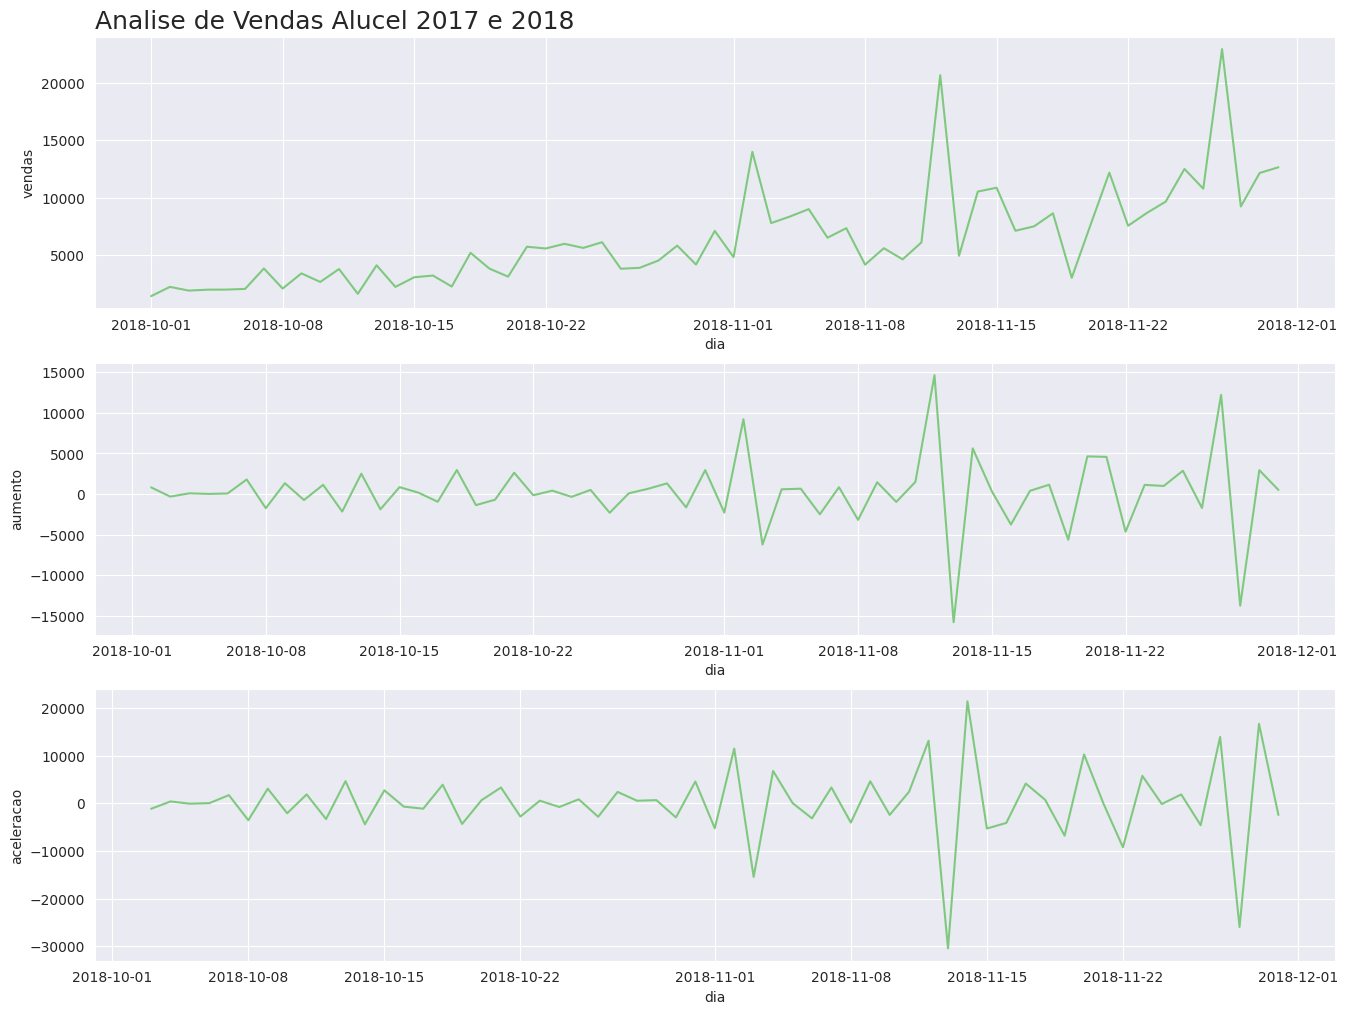

In [224]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Analise de Vendas Alucel 2017 e 2018')

# media movel

In [226]:
alucel['media_movel'] = alucel['vendas'].rolling(window=7).mean()
alucel.head(8)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143


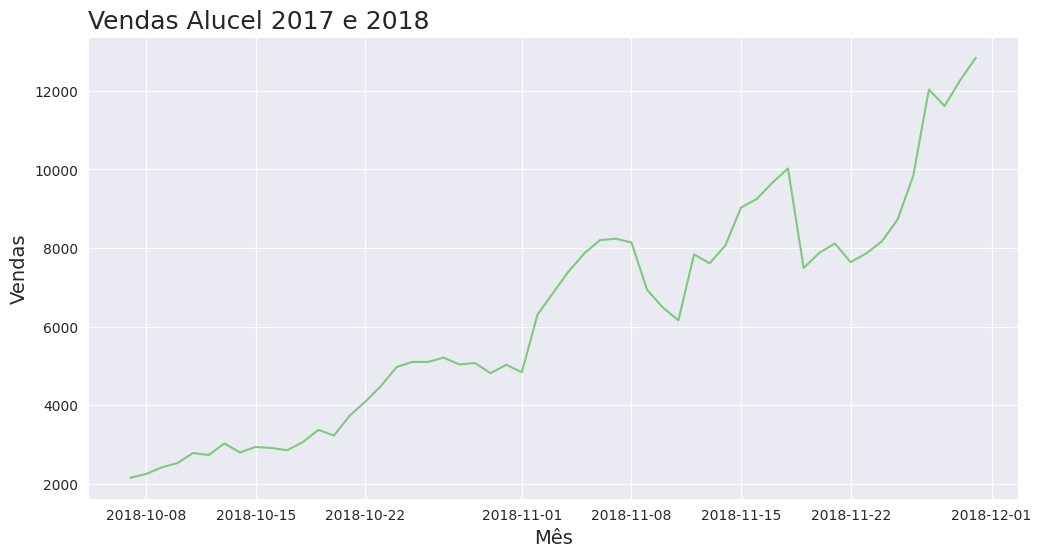

In [228]:
plotar('Vendas Alucel 2017 e 2018', 'Mês', 'Vendas', 'dia', 'media_movel', alucel)

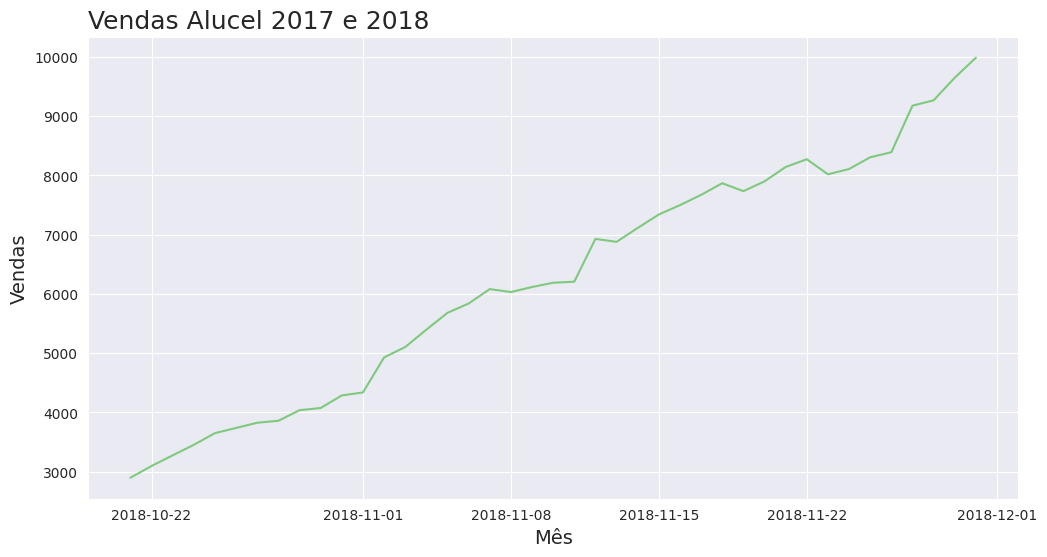

In [229]:
alucel['media_movel_21'] = alucel['vendas'].rolling(window=21).mean()
plotar('Vendas Alucel 2017 e 2018', 'Mês', 'Vendas', 'dia', 'media_movel_21', alucel)

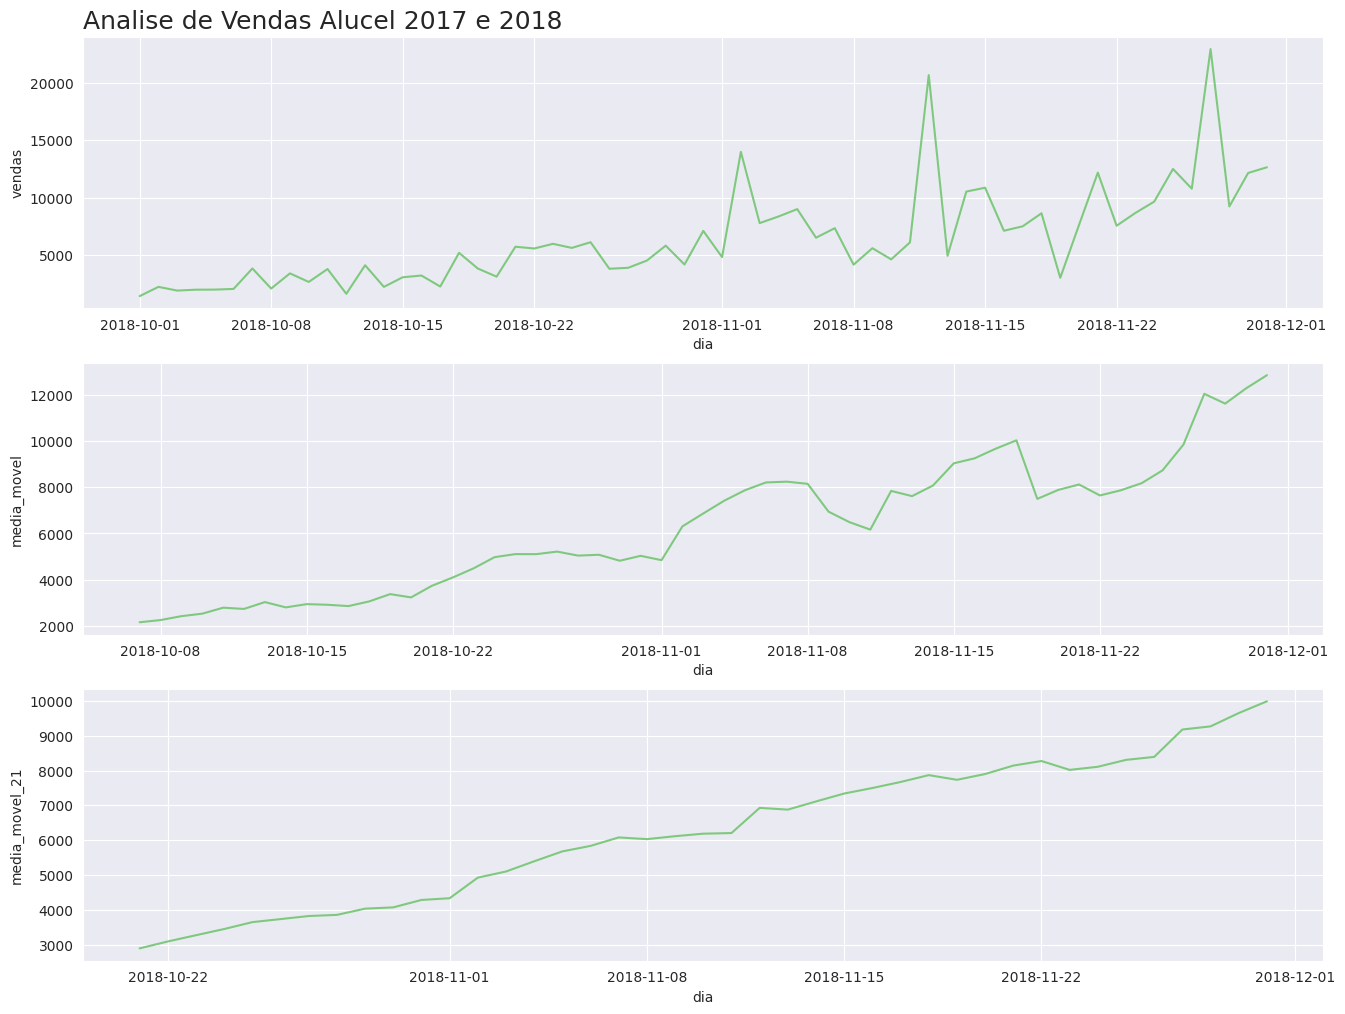

In [230]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Analise de Vendas Alucel 2017 e 2018')
#